<h1> Introduction </h1>
Cardiovascular diseases (CVDs) or heart disease are the number one cause of death globally with 17.9 million death cases each year. CVDs are concertedly contributed by hypertension, diabetes, overweight and unhealthy lifestyles. You can read more on the heart disease statistics and causes for self-understanding. This project covers manual exploratory data analysis and using pandas profiling in Jupyter Notebook, on Google Colab. The dataset used in this project is UCI Heart Disease dataset, and both data and code for this project are available on our GitHub repository. We will build a model for predicting cardiovascular disease.

<h2> Variables/Features Explanation </h2>
1. age (Age in days) sex : (1 = female 2 = male) 
2. cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: typical angina] 
- trestbps (Resting Blood Pressure in mm/hg ) 
- chol (Serum Cholesterol in mg/dl) 
- fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes] 
- restecg (Resting ECG): [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, 2: having ST-T wave abnormality] 
- thalach (maximum heart rate achieved) exang (Exercise Induced Angina): [1 = yes, 0 = no] 
- oldpeak (ST depression induced by exercise relative to rest) 
- slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping] 
- ca [number of major vessels (0–3) thal : [1 = normal, 2 = fixed defect, 3 = reversible defect] target: [0 = disease, 1 = no disease]

<h2> Importing the required Libraries </h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<h2> Loading the Dataset </h2>

In [2]:
df=pd.read_csv(r'/Users/briangor/Downloads/cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


As seen above, since we had 70k rows above and each column has 70k rows, that indicates that there are no missing value in our dataset.

In [4]:
#df['age']=df['age']/365 #Coverting the age from days to years

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


It outputs descriptive statistics. According to our output, we can summarize our finding as:
The minumum person's age in the dataset is approximately 30 years and maximum being 65 years, and average is 53 years.
Also, the maximum height of a patient is 250 cm which is approximately 2.5 meters, minimum height is 55cm, while the average height is 164cm. 

<h2> Exploratory Data Analysis </h2>

In [6]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [7]:
df['smoke'].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

Smokers in our dataset are 6169 while non-smokers are 63831.

In [8]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

The output suggests that in the dataset, 34979 people have CVD while 35021 do not

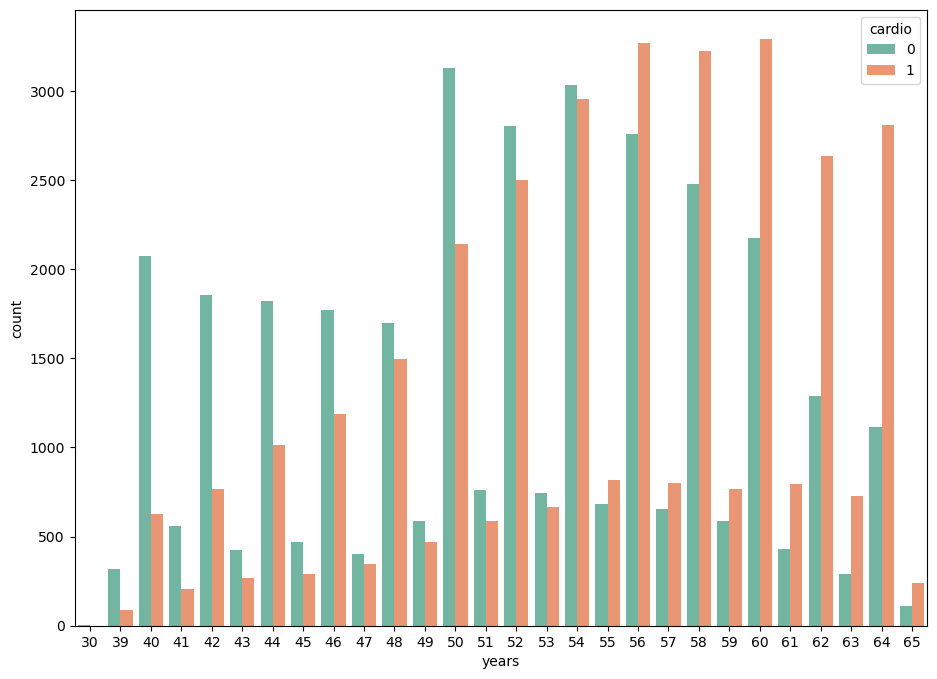

In [9]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

As we can see from above, people above 55 years are more exposed to having CVD.

In [10]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

'1' stands for women while '2' stands for the male gender. Therefore, the females are greater than males in this dataset. Does this indicate females are of high chance of being with CVD than males? Let us find out

In [11]:
df.groupby('gender')['cardio'].value_counts()

gender  cardio
1       0         22914
        1         22616
2       1         12363
        0         12107
Name: cardio, dtype: int64

As '1' stands for females, and also '1' stands for positive cvd. the females with CVD are 22616 while the '2' males with CVD are 12107. Maybe females are likely to possess CVD unlike males. We'll have to do more analysis to come up with a conclusion

In [13]:
x=df.groupby('gender')['smoke'].value_counts()
x

gender  smoke
1       0        44717
        1          813
2       0        19114
        1         5356
Name: smoke, dtype: int64

According to our output, the male smokers are more than female smokers

<AxesSubplot:>

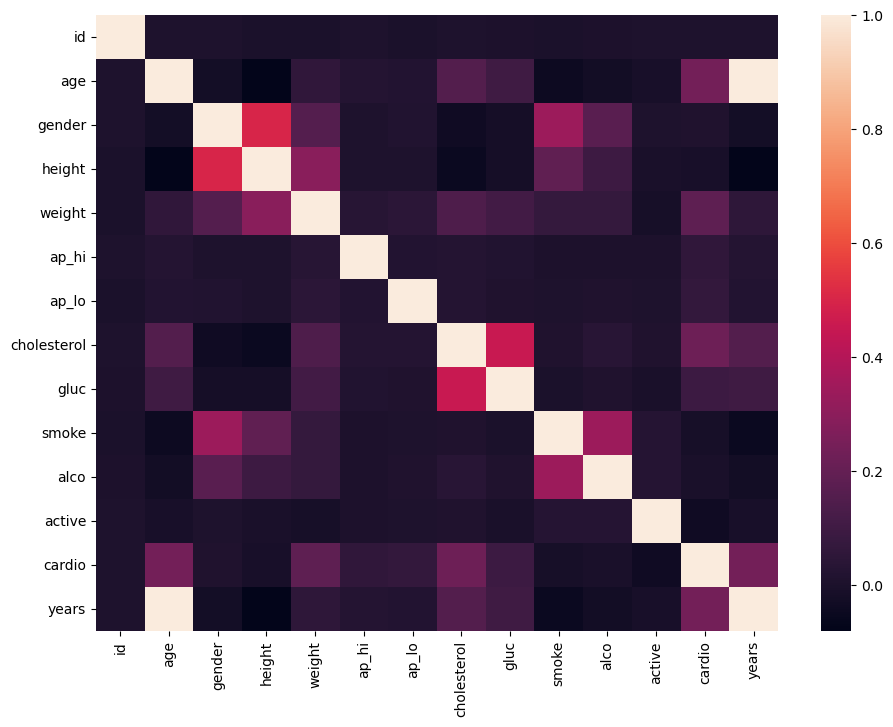

In [15]:
sns.heatmap(df.corr())

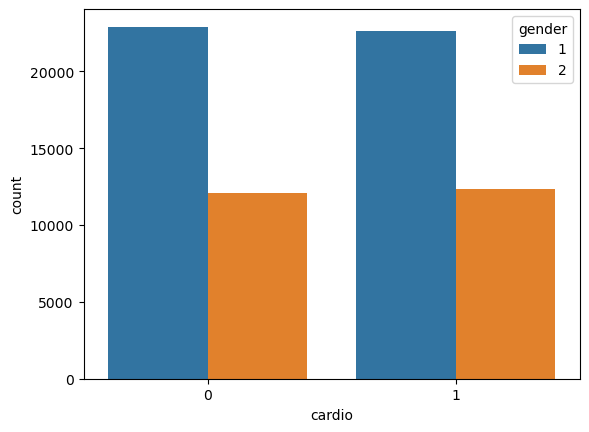

In [4]:
sns.countplot(data=df, x='cardio', hue='gender')
plt.show()

<h2> Pandas Profiling Report <h2>

In [16]:
import pandas_profiling as pp

In [18]:
from pandas_profiling import ProfileReport

profile=ProfileReport(df, title='Pandas Profiling Report')

<h2> Data Visualizations </h2>

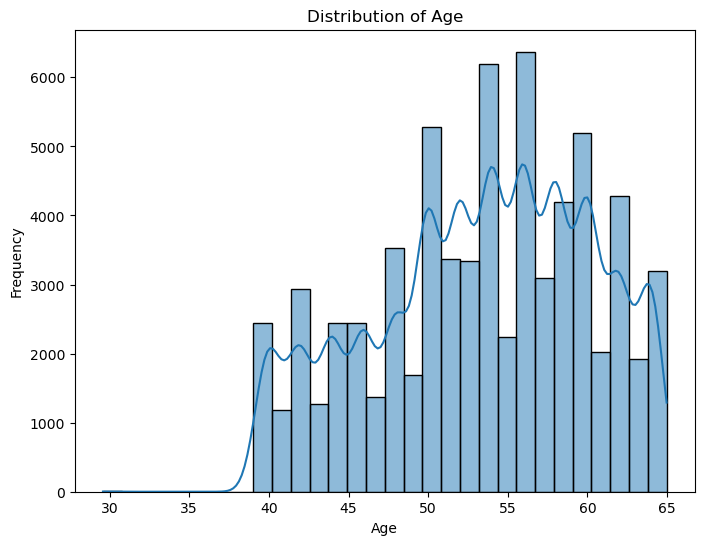

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age']/365, bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

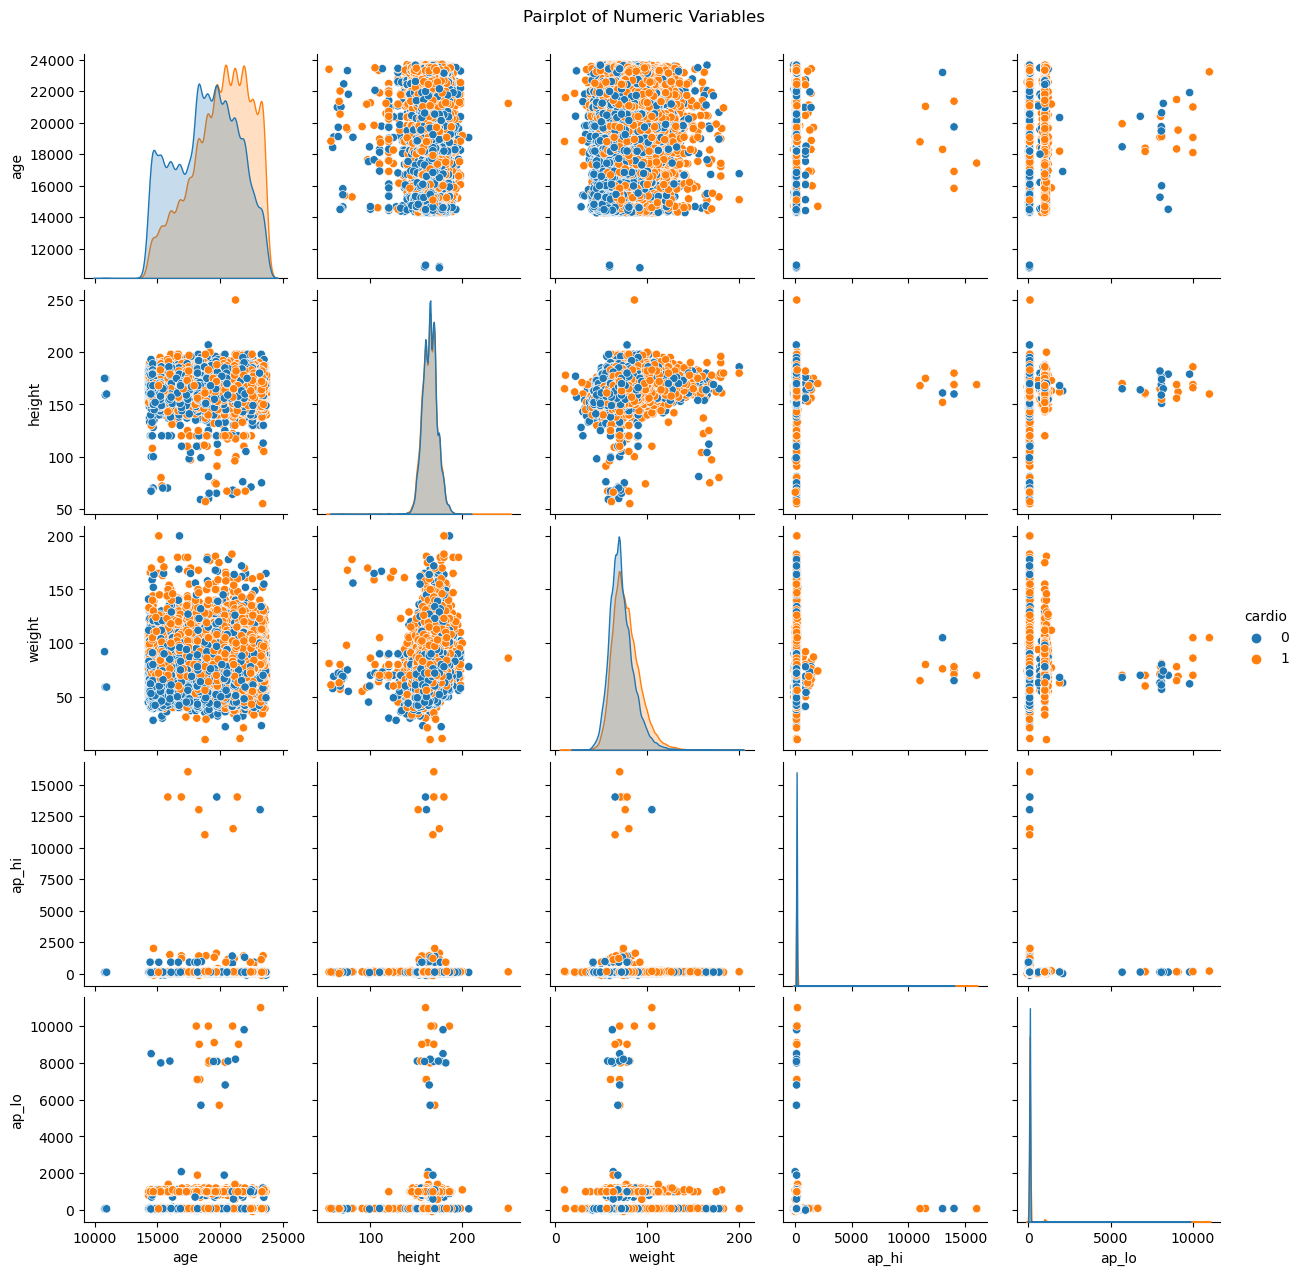

In [7]:
sns.pairplot(df, hue='cardio', vars=['age', 'height', 'weight', 'ap_hi', 'ap_lo'])
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()

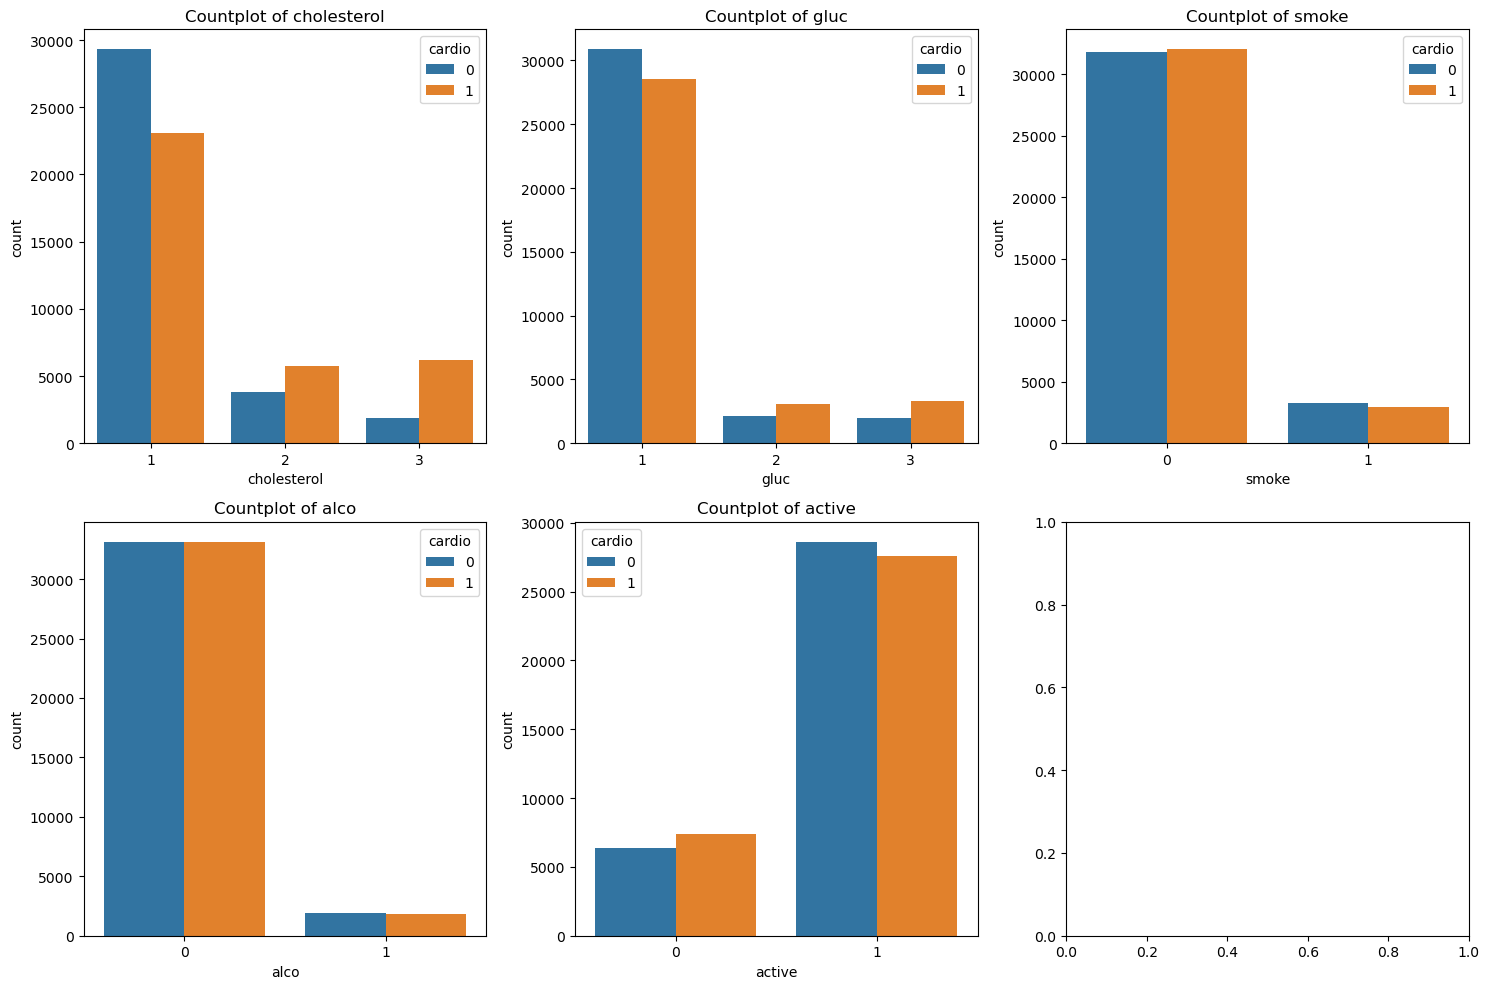

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, col in enumerate(['cholesterol', 'gluc', 'smoke', 'alco', 'active']):
    sns.countplot(data=df, x=col, hue='cardio', ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

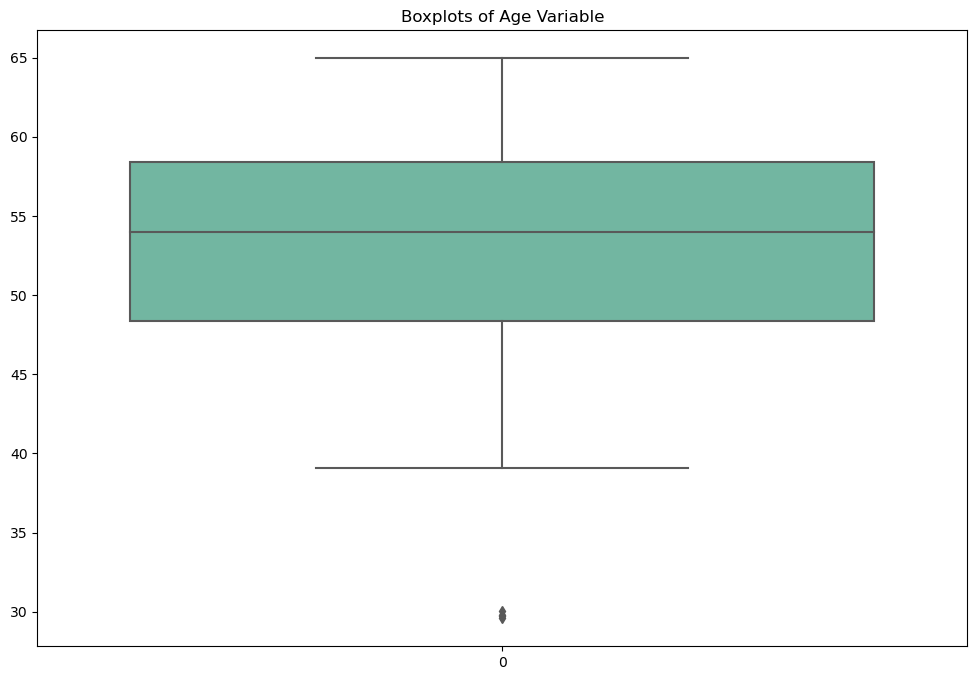

In [15]:
# Create a boxplot for age variable
plt.figure(figsize=(12, 8))
sns.boxplot(data=df['age']/365, palette='Set2')
plt.title('Boxplots of Age Variable')
plt.show()

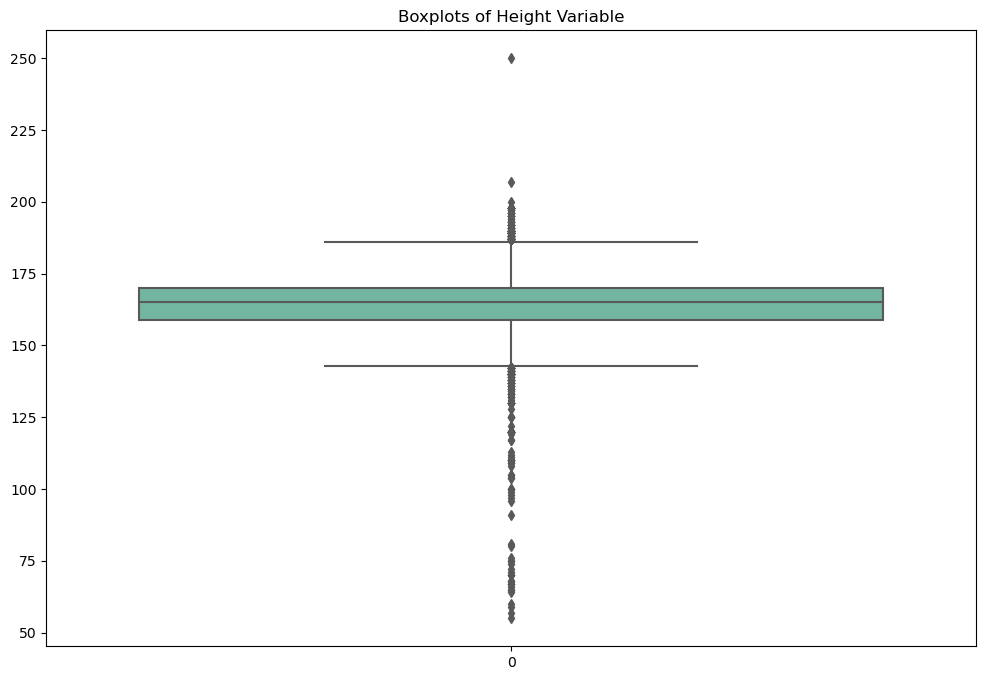

In [14]:
# Create a boxplot for height variable
plt.figure(figsize=(12, 8))
sns.boxplot(data=df['height'], palette='Set2')
plt.title('Boxplots of Height Variable')
plt.show()

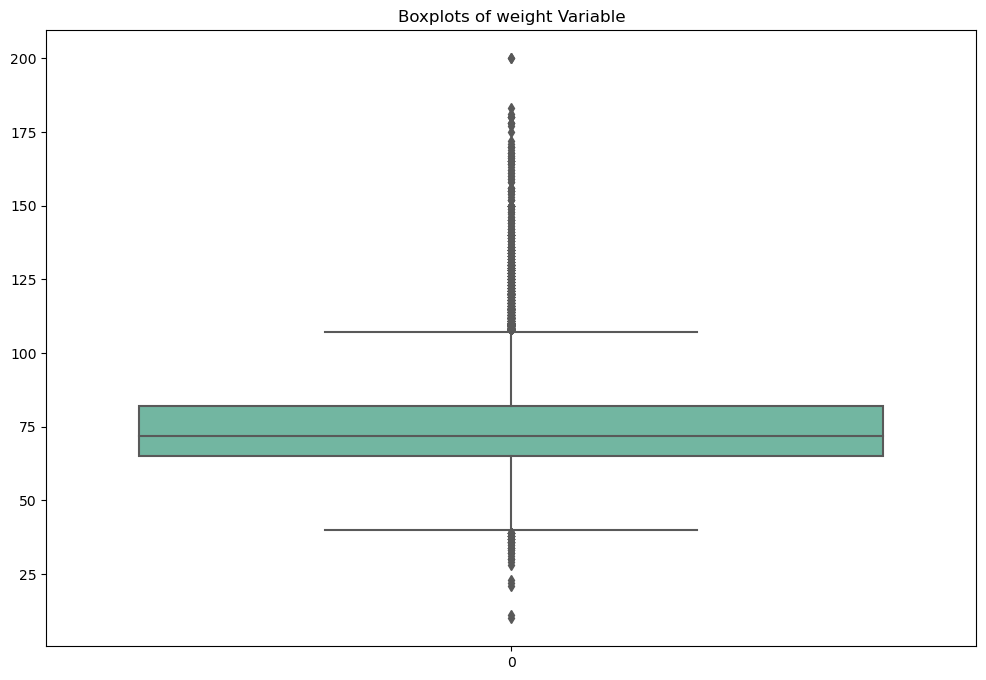

In [16]:
# Create a boxplot for weight variable
plt.figure(figsize=(12, 8))
sns.boxplot(data=df['weight'], palette='Set2')
plt.title('Boxplots of weight Variable')
plt.show()

In [ ]:
# Create a boxplot for api variable
plt.figure(figsize=(12, 8))
sns.boxplot(data=df['age'], palette='Set2')
plt.title('Boxplots of Numeric Variables')
plt.show()

<h2> Model Building </h2>

In [17]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
# Feature Engineering
# Data Splitting
X = df.drop(['cardio'], axis=1)
y = df['cardio']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Model Building
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Model Evaluation
y_pred = model.predict(X_test)

print('The models performance is as follows: ')
print(classification_report(y_test, y_pred))
print('-----------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('------------------------------------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))

The models performance is as follows: 
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      6988
           1       0.72      0.66      0.69      7012

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000

-----------------------------------------------------
[[5137 1851]
 [2352 4660]]
------------------------------------------------------
Accuracy: 0.6997857142857142


The classification report and the confusion matrix provided give an evaluation of a binary classification model's performance. Here's the interpretation:

1. **Precision**: Precision measures the proportion of true positive predictions (1s) out of all positive predictions (both true positives and false positives). In this case, for class 0, the precision is 0.69, and for class 1, the precision is 0.72. This indicates that when the model predicts a positive (1), it is correct about 69% of the time for class 0 and 72% of the time for class 1.

2. **Recall**: Recall measures the proportion of true positive predictions out of all actual positive instances. For class 0, the recall is 0.74, and for class 1, the recall is 0.66. This indicates that the model is able to identify 74% of the actual class 0 instances and 66% of the actual class 1 instances.

3. **F1-Score**: The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.71, and for class 1, the F1-score is 0.69.

4. **Support**: This is the number of actual instances for each class in the dataset. There are 6,988 instances of class 0 and 7,012 instances of class 1.

5. **Accuracy**: The overall accuracy of the model is 0.70 (or 70%). It measures the proportion of correctly classified instances out of the total instances in the dataset.

6. **Confusion Matrix**: The confusion matrix shows the count of true positives, true negatives, false positives, and false negatives. In this case, there are 5,137 true negatives, 1,851 false positives, 2,352 false negatives, and 4,660 true positives.

Overall, the model has a decent performance with an accuracy of 70%. It performs slightly better in classifying class 1 (1s) with a higher precision and recall compared to class 0 (0s). However, the model can still be improved, especially in reducing the number of false positives and false negatives, depending on the specific goals of the classification task.

Improving a machine learning model's performance can involve several strategies. Here are some common approaches to enhance the performance of a classification model like the one you've described:

1. **Feature Engineering**:
   - Carefully select and engineer features. This may involve creating new features, transforming existing ones, or selecting the most relevant features.
   - Consider using domain knowledge to identify informative features.

2. **Data Preprocessing**:
   - Handle missing values: Address missing data through imputation or removal.
   - Scaling and normalization: Ensure that all features are on a similar scale.
   - Encoding categorical variables: Convert categorical variables into a numerical format, such as one-hot encoding.

3. **Data Augmentation**:
   - Augment the dataset by creating additional synthetic data, especially if the dataset is imbalanced.

4. **Hyperparameter Tuning**:
   - Optimize the hyperparameters of the model. This can include parameters like learning rate, regularization strength, or the choice of a specific algorithm.

5. **Model Selection**:
   - Experiment with different machine learning algorithms, including logistic regression, decision trees, random forests, support vector machines, or gradient boosting.

6. **Ensemble Methods**:
   - Combine multiple models, such as bagging or boosting, to create an ensemble model that can improve predictive performance.

7. **Regularization**:
   - Apply regularization techniques like L1 or L2 regularization to prevent overfitting and improve the model's generalization.

8. **Cross-Validation**:
   - Use techniques like k-fold cross-validation to assess how well the model generalizes to unseen data and to avoid overfitting.

9. **Address Class Imbalance**:
   - If the dataset is imbalanced, use techniques like oversampling, undersampling, or synthetic data generation to balance the classes.

10. **Feature Selection**:
    - Consider feature selection techniques to identify the most important features for the model.

11. **Error Analysis**:
    - Examine the model's errors and misclassifications to identify patterns and areas where the model can be improved.

12. **Collect More Data**:
    - If possible, gather more data to improve the model's ability to learn and generalize.

13. **Optimize Thresholds**:
    - Adjust the probability thresholds for classification to achieve a desired trade-off between precision and recall.

It's important to note that the choice of improvement strategies may depend on the specific characteristics of your dataset and the nature of the problem you are trying to solve. Additionally, a combination of these strategies may yield the best results. Regularly evaluating and fine-tuning your model is essential for achieving the best performance.